# Source

https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

# Import statements

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import PredictionErrorDisplay

drive.mount('/content/drive')

Mounted at /content/drive


# Data exploring

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/STUDIA/Billionaires Statistics Dataset23.csv')
df = pd.DataFrame().assign(Rank=df['rank'], PersonName=df['personName'], Country=df['country'], GDPperCapita=df["gdp_country"]/df["population_country"], TotalTaxRate=df['total_tax_rate_country'], CPI=df['cpi_country'])
df

,Rank,PersonName,Country,GDPperCapita,TotalTaxRate,CPI
0,1,Bernard Arnault & family,France,40493.928572,60.7,110.05
1,2,Elon Musk,United States,65280.682241,36.6,117.24
2,3,Jeff Bezos,United States,65280.682241,36.6,117.24
3,4,Larry Ellison,United States,65280.682241,36.6,117.24
4,5,Warren Buffett,United States,65280.682241,36.6,117.24
...,...,...,...,...,...,...
2635,2540,Yu Rong,China,14244.677921,59.2,125.08
2636,2540,"Richard Yuengling, Jr.",United States,65280.682241,36.6,117.24
2637,2540,Zhang Gongyun,China,14244.677921,59.2,125.08
2638,2540,Zhang Guiping & family,China,14244.677921,59.2,125.08


We do not need so many attributes so we make a new data frame.

# Data cleaning

In [4]:
df.isna().sum()

Rank              0
PersonName        0
Country          38
GDPperCapita    164
TotalTaxRate    182
CPI             184
dtype: int64

We see that we've got some NaN values, so we need to get rid of them.


In [5]:
data_train_clean = df.dropna()
data_train_clean

,Rank,PersonName,Country,GDPperCapita,TotalTaxRate,CPI
0,1,Bernard Arnault & family,France,40493.928572,60.7,110.05
1,2,Elon Musk,United States,65280.682241,36.6,117.24
2,3,Jeff Bezos,United States,65280.682241,36.6,117.24
3,4,Larry Ellison,United States,65280.682241,36.6,117.24
4,5,Warren Buffett,United States,65280.682241,36.6,117.24
...,...,...,...,...,...,...
2635,2540,Yu Rong,China,14244.677921,59.2,125.08
2636,2540,"Richard Yuengling, Jr.",United States,65280.682241,36.6,117.24
2637,2540,Zhang Gongyun,China,14244.677921,59.2,125.08
2638,2540,Zhang Guiping & family,China,14244.677921,59.2,125.08


In [ ]:
data_train_clean.sort_values('Rank', inplace=True)
data_train_clean.duplicated().sum()

<ipython-input-6-de559454050e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_clean.sort_values('Rank', inplace=True)


0

Fortunately, there is no duplcates in our file!

# Finding target value

What we need to do it to find a target value that will be an amount of billionaires in particular country.



But firstly we will make a new data frame that will contain all of economical indicators of countries.

In [10]:
data_train_clean.nunique()

Rank             214
PersonName      2454
Country           64
GDPperCapita      64
TotalTaxRate      61
CPI               63
dtype: int64

In [6]:
economical_indicators = data_train_clean.drop_duplicates(subset=['Country']).sort_values('Country')
economical_indicators.head()

,Rank,PersonName,Country,GDPperCapita,TotalTaxRate,CPI
604,591,Issad Rebrab & family,Algeria,3948.343279,66.1,151.36
554,552,Marcos Galperin,Argentina,10006.148974,106.3,232.75
2375,2259,Ruben Vardanyan & family,Armenia,4622.733493,22.6,129.18
51,52,Gina Rinehart,Australia,54049.828812,47.4,119.80
36,37,Mark Mateschitz,Austria,50277.275087,51.4,118.06


In [7]:
target_value = data_train_clean[['PersonName', 'Country']].groupby('Country').count()
target_value

,PersonName
Country,
Algeria,1
Argentina,4
Armenia,1
Australia,43
Austria,11
...,...
United Arab Emirates,17
United Kingdom,82
United States,754


In [8]:
df_country = pd.DataFrame().assign(Country=economical_indicators.Country, GDPperCapita=economical_indicators.GDPperCapita, CPI=economical_indicators.CPI, TotalTaxRate=economical_indicators.TotalTaxRate, AmountOfBillionaires=target_value.values)

In [ ]:
# df_country.to_csv("/content/drive/MyDrive/Colab Notebooks/STUDIA/Billionaires_Country_Data.csv")

In [9]:
df_country.head()

,Country,GDPperCapita,CPI,TotalTaxRate,AmountOfBillionaires
604,Algeria,3948.343279,151.36,66.1,1
554,Argentina,10006.148974,232.75,106.3,4
2375,Armenia,4622.733493,129.18,22.6,1
51,Australia,54049.828812,119.80,47.4,43
36,Austria,50277.275087,118.06,51.4,11


# Data splitting

Now we need to split our data for training and testing sets for future regression and classification.

In [12]:
data_train, data_test= train_test_split(df_country, test_size=0.2, random_state=20)
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=20)

In [13]:
# Define features and target variable
X = df_country[['GDPperCapita', 'CPI', 'TotalTaxRate']]
y = df_country['AmountOfBillionaires']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=20)

In [14]:
X_train.isna().values.any()

False

In [15]:
X_test.isna().values.any()

False

# Visualisation

In [ ]:
scatter = px.scatter(data_train,
                     x='GDPperCapita',
                     y='AmountOfBillionaires',
                     title='GDP per Capita vs. Billionaires Amount',
                     size='AmountOfBillionaires',
                     hover_name=data_train.Country,
                     color='AmountOfBillionaires')

scatter.update_layout(xaxis_title="GDPperCapita",
                      yaxis_title="AmountOfBillionaires",
                      yaxis=dict(type='log'))

scatter.show()

In [ ]:
scatter = px.scatter(data_train,
                     x='TotalTaxRate',
                     y='CPI',
                     title='TotalTaxRate and CPI vs. Billionaires Amount',
                     size='AmountOfBillionaires',
                     hover_name=data_train.Country,
                     color='GDPperCapita')

scatter.update_layout(xaxis_title="TotalTaxRate",
                      yaxis_title="CPI",
                      yaxis=dict(type='log'))

scatter.show()

In [ ]:
fig = px.bar(data_train, x='AmountOfBillionaires', y='Country', orientation='h')
fig.show()

<ipython-input-16-a9fca8dca026>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()


<Axes: >

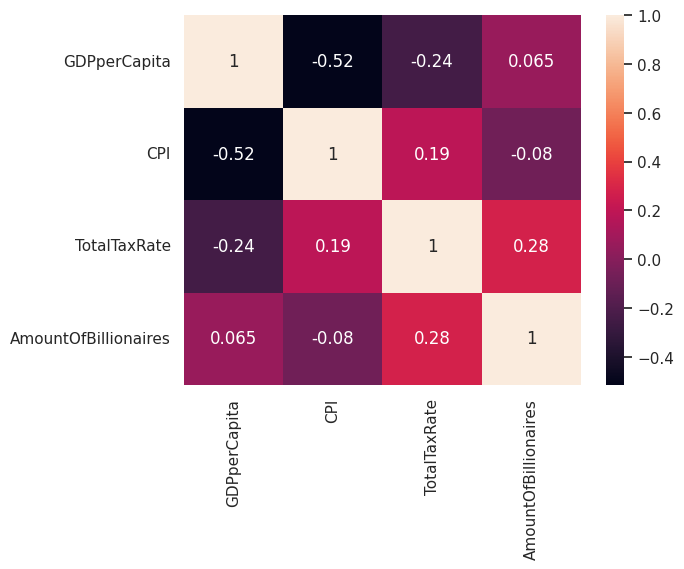

In [16]:
corr = data_train.corr()
sns.set(font_scale=1)
sns.heatmap(corr, annot=True)

We see that our plots are very unreadable so we need to scale our data.

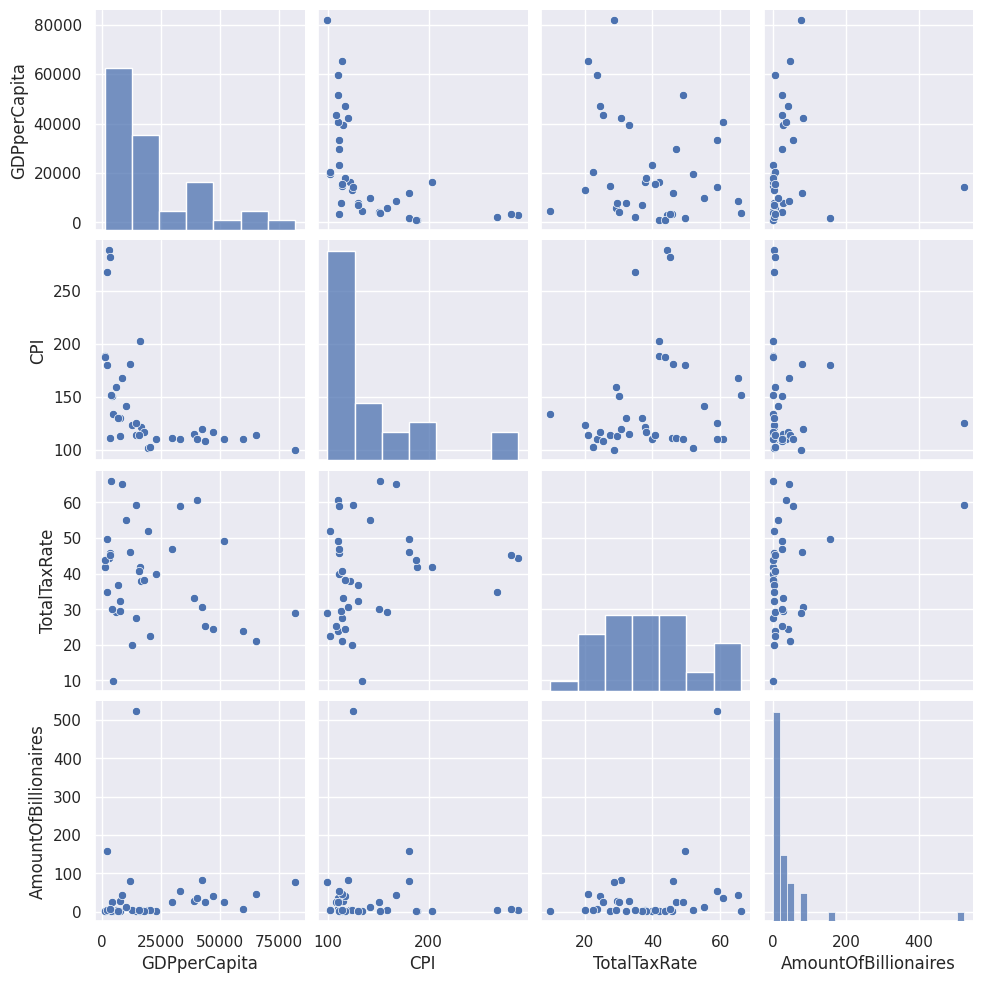

In [ ]:
sns.pairplot(data_train[['GDPperCapita', 'CPI', 'TotalTaxRate', 'AmountOfBillionaires']])
plt.show()

<Figure size 1200x800 with 0 Axes>

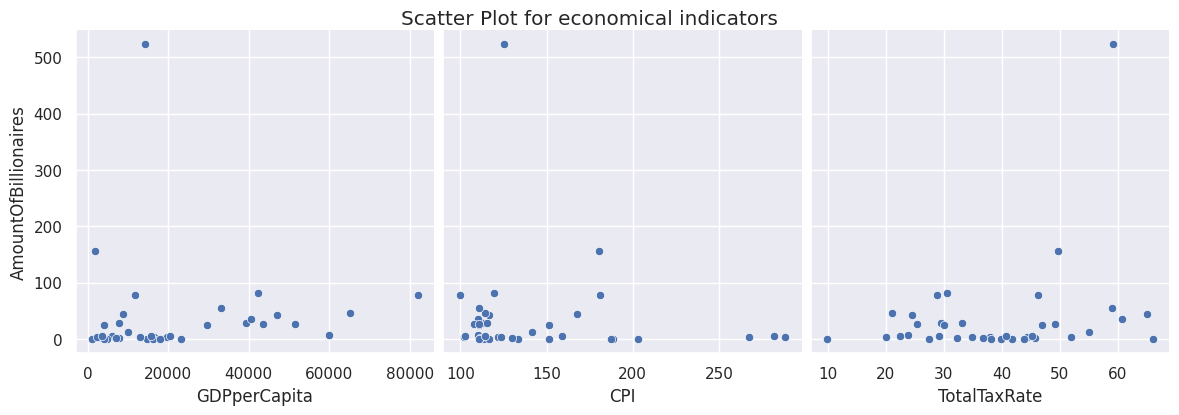

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(data_train, x_vars=['GDPperCapita', 'CPI', 'TotalTaxRate'], y_vars='AmountOfBillionaires', height=4)
plt.suptitle('Scatter Plot for economical indicators', y=1.02)
plt.show()

# Data normalization and standarization

We have to use normalization and standarization techniques to scale the features in your dataset before feeding them into machine learning algorithms.

To do this we need to drop country column beacuse it is string type and also we do not want to scale target value so we will drop amount of nillionaires column as well.

In [ ]:
data_train_scale = data_train.drop(['Country', 'AmountOfBillionaires'], axis='columns')

In [ ]:
standard_scaler = StandardScaler().set_output(transform="pandas")
data_standardized = standard_scaler.fit_transform(data_train_scale)

minmax_scaler = MinMaxScaler().set_output(transform="pandas")
data_normalized = minmax_scaler.fit_transform(data_train_scale)

In [ ]:
data_normalized["AmountOfBillionaires"] = data_train["AmountOfBillionaires"]
data_normalized

,GDPperCapita,CPI,TotalTaxRate,AmountOfBillionaires
313,0.726015,0.057137,0.247331,7
1656,0.000000,0.471802,0.567616,1
1105,0.167399,0.073960,0.311388,1
1921,0.190363,0.116866,0.498221,3
8,0.010378,0.427944,0.708185,157
1564,0.146417,0.128187,0.179715,3
1905,0.026513,0.060946,0.638790,2
157,0.060927,0.314147,0.343416,5
12,0.352715,0.060364,0.660142,25
1084,0.082959,0.161200,0.396797,2


In [ ]:
data_standardized["AmountOfBillionaires"] = data_train["AmountOfBillionaires"]
data_standardized

,GDPperCapita,CPI,TotalTaxRate,AmountOfBillionaires
313,1.937404,-0.668871,-1.154450,7
1656,-0.984697,0.952102,0.198375,1
1105,-0.310942,-0.603106,-0.883885,1
1921,-0.218514,-0.435383,-0.094737,3
8,-0.942929,0.780657,0.792115,157
1564,-0.395389,-0.391126,-1.440047,3
1905,-0.877986,-0.653981,0.499003,2
157,-0.739476,0.335810,-0.748603,5
12,0.434927,-0.656256,0.589191,25
1084,-0.650800,-0.262077,-0.523132,2


In [ ]:
scatter = px.scatter(data_standardized,
                     x='GDPperCapita',
                     y='AmountOfBillionaires',
                     title='GDP per Capita vs. Billionaires Amount',
                     size='AmountOfBillionaires',
                     color='AmountOfBillionaires')

scatter.update_layout(xaxis_title="GDPperCapita",
                      yaxis_title="AmountOfBillionaires",
                      yaxis=dict(type='log'))

scatter.show()

In [ ]:
scatter = px.scatter(data_normalized,
                     x='GDPperCapita',
                     y='AmountOfBillionaires',
                     title='GDP per Capita vs. Billionaires Amount',
                     size='AmountOfBillionaires',
                     color='AmountOfBillionaires')

scatter.update_layout(xaxis_title="GDPperCapita",
                      yaxis_title="AmountOfBillionaires",
                      yaxis=dict(type='log'))

scatter.show()

# Principal component analysis (PCA)

In [ ]:
data_train_pca = data_train.drop(['Country'], axis='columns')

In [ ]:
pca = PCA().set_output(transform="pandas").fit(data_train_pca)
data_pca = pca.transform(data_train_pca)
data_pca.head()

,pca0,pca1,pca2,pca3
313,38952.965604,-40.796720,14.307326,7.654187
1656,-19798.130151,-30.279704,20.520881,-0.182592
1105,-6251.687759,-32.631122,-38.354133,10.045572
1921,-4393.367403,-31.002239,-27.558424,-0.348980
8,-18958.293419,125.847683,18.566657,-1.064141


<Axes: xlabel='pca0', ylabel='pca1'>

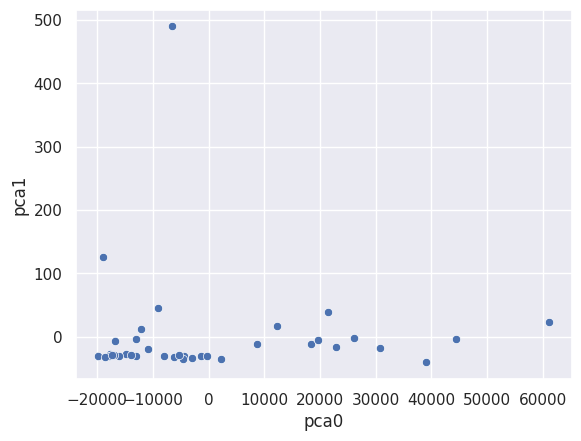

In [ ]:
sns.scatterplot(data=data_pca, x=data_pca["pca0"], y=data_pca["pca1"])

<Axes: xlabel='pca1', ylabel='pca2'>

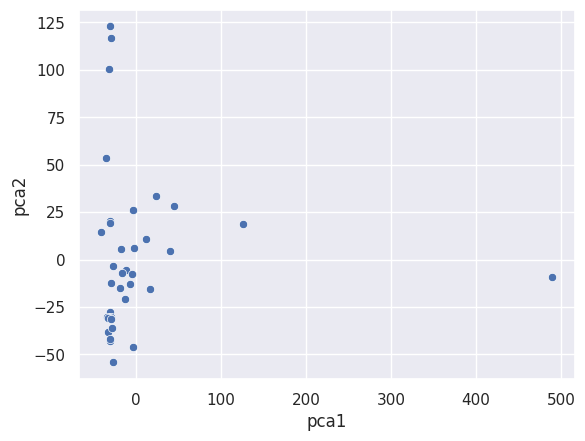

In [ ]:
sns.scatterplot(data=data_pca, x=data_pca["pca1"], y=data_pca["pca2"])

<Axes: xlabel='pca0', ylabel='pca3'>

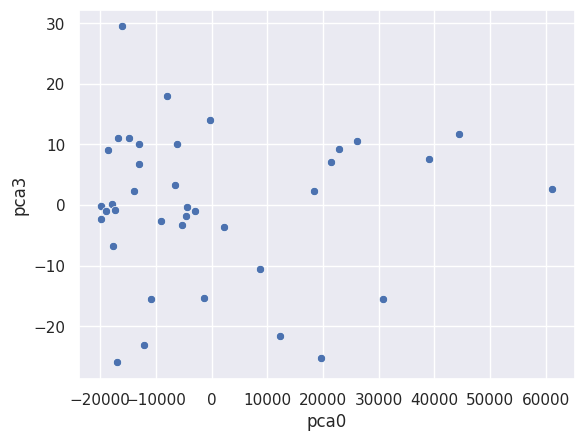

In [ ]:
sns.scatterplot(data=data_pca, x=data_pca["pca0"], y=data_pca["pca3"])

<Axes: xlabel='pca0', ylabel='pca2'>

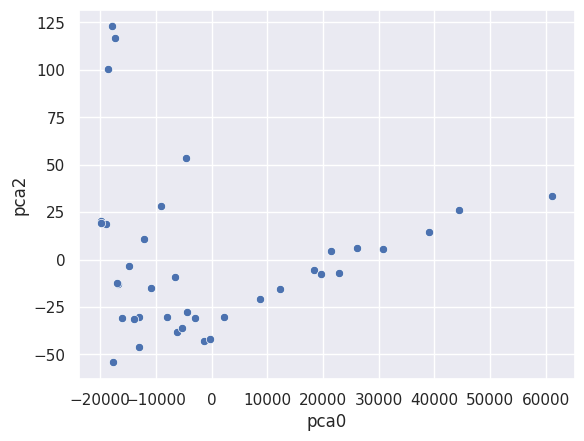

In [ ]:
sns.scatterplot(data=data_pca, x=data_pca["pca0"], y=data_pca["pca2"])

# Regression model

Here we made simple linear regression visualization using seaborn library, as we can see and predict it could be suiting for our problem.

<Figure size 1200x800 with 0 Axes>

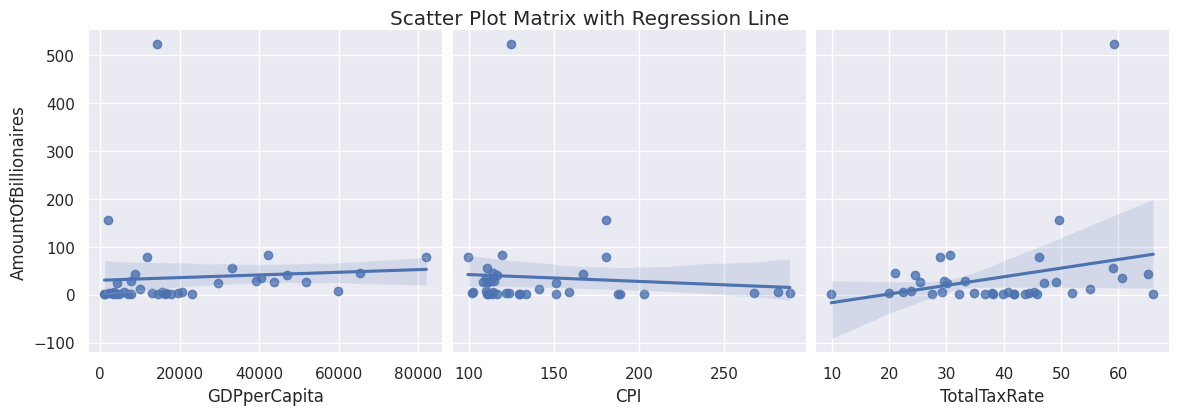

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(data_train, x_vars=['GDPperCapita', 'CPI', 'TotalTaxRate'], y_vars='AmountOfBillionaires', kind='reg', height=4)
plt.suptitle('Scatter Plot Matrix with Regression Line', y=1.02)
plt.show()

## Linear Regression

Now let's see RMSE of linear regression we made using scikit library.

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

In [ ]:
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_train

81.6964986988617

In [ ]:
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
rmse_val

36.1107770694448

As we can see there is a big error on training set, it is due to countries with much bigger amount of billionaires that we can name as outliers. In next steps we will try to improve performance of regression.

## Weighted Linear Regression

### 1

Using weighted linear regression we make countries with let's say "enormous" amount of billionaires, in comparison to other countries, less important than others.

In [ ]:
weights = 2 - y_train/(max(y_train))

In [ ]:
weights = weights/max(weights)

In [ ]:
weights

313     0.994258
1656    1.000000
1105    1.000000
1921    0.998086
8       0.850718
1564    0.998086
1905    0.999043
157     0.996172
12      0.977033
1084    0.999043
115     0.974163
14      0.500478
190     0.973206
0       0.967464
55      0.977033
579     1.000000
165     0.958852
39      0.922488
21      0.960766
557     1.000000
7       0.988517
153     0.976077
454     0.998086
1654    1.000000
1232    0.996172
309     0.997129
122     0.956938
28      0.926316
61      0.925359
604     1.000000
1925    1.000000
659     1.000000
156     0.948325
1979    0.999043
124     0.998086
416     0.996172
103     0.976077
444     0.995215
Name: AmountOfBillionaires, dtype: float64

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train, weights)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

In [ ]:
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_train

82.63492313290917

In [ ]:
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
rmse_val

32.34839482448021

### 2

Just for a test, we wanted to make our outliers more important than others, to see if our reasoning is valid.

In [ ]:
weights =  y_train/(max(y_train)-54)

In [ ]:
weights

313     0.014925
1656    0.002132
1105    0.002132
1921    0.006397
8       0.334755
1564    0.006397
1905    0.004264
157     0.010661
12      0.053305
1084    0.004264
115     0.059701
14      1.115139
190     0.061834
0       0.074627
55      0.053305
579     0.002132
165     0.093817
39      0.174840
21      0.089552
557     0.002132
7       0.027719
153     0.055437
454     0.006397
1654    0.002132
1232    0.010661
309     0.008529
122     0.098081
28      0.166311
61      0.168443
604     0.002132
1925    0.002132
659     0.002132
156     0.117271
1979    0.004264
124     0.006397
416     0.010661
103     0.055437
444     0.012793
Name: AmountOfBillionaires, dtype: float64

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train, weights)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

In [ ]:
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_train

207.81410219013503

In [ ]:
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
rmse_val

177.80550960931015

As you can up there, error is much higher on these two subsets, as it should be.

## Neural Network

For comparison and possibly better results we will use Neural Network to build our regression model.

### 1

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(2, 10), max_iter=4000, random_state=10, solver='adam', activation='relu')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

In [ ]:
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_train

88.6377141978199

In [ ]:
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
rmse_val

40.99990804409305

### 2

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(20, 20, 20, 20), activation="relu", random_state=10, max_iter=2000, solver="lbfgs")
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

In [ ]:
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_train

85.46505742770319

In [ ]:
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
rmse_val

36.77674925687437

### 3

In [ ]:
reg = MLPRegressor(activation='tanh', hidden_layer_sizes=1, max_iter=4000, random_state=10, solver='adam')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.



In [ ]:
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_train

91.06406528515541

In [ ]:
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
rmse_val

28.61386026747006

As we can see, we used several different parameters of MLPRegression, Result are very similar to each other. The best regression model at the moment is weighted linear regression.

# Cross Validation

## Data Splitting for Cross Validation

In [ ]:
# Define features and target variable
X = df_country[['GDPperCapita', 'CPI', 'TotalTaxRate']]
y = df_country['AmountOfBillionaires']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
weights =  y_train/(max(y_train)-54)
reg = LinearRegression()

## Cross Validation for 3:

In [ ]:
scores = cross_val_score(reg, X_train2, y_train2, cv=3,
scoring='neg_root_mean_squared_error')

In [ ]:
np.mean(scores)

-69.83252722862848

## Cross Validation for 5:



In [ ]:
scores = cross_val_score(reg, X_train2, y_train2, cv=5,
scoring='neg_root_mean_squared_error')

In [ ]:
np.mean(scores)

-66.25858126292431

## Cross Validation for 10:

In [ ]:
scores = cross_val_score(reg, X_train2, y_train2, cv=10,
scoring='neg_root_mean_squared_error')

In [ ]:
np.mean(scores)

-56.58221814231787

## Metrics for Cross Validation

In [ ]:
scores = cross_validate(reg, X_train2, y_train2, cv=5,
scoring=['r2','neg_mean_absolute_error'])
print(scores['test_neg_mean_absolute_error'])
print(scores['test_r2'])
print(scores['fit_time'])
print(scores['score_time'])

[-38.04228367 -35.69697355 -32.31997482 -31.33096217 -74.43894198]
[ -0.12569044 -10.11121345  -1.84452774  -3.91420701  -0.10936683]
[0.00464439 0.00249004 0.0023098  0.00295424 0.00281048]
[0.0018425  0.00159383 0.00158429 0.00184035 0.00184512]


In [ ]:
print(np.mean(scores['test_neg_mean_absolute_error']))
print(np.mean(scores['test_r2']))

-42.365827237627556
-3.2210010951859056


## Grid Search

### 2 Layers


In [ ]:
param = {
    'hidden_layer_sizes':[(x, y) for x in range(1, 11) for y in range(1, 11)],
    'activation': ['identity','logistic','tanh','relu'],
    'random_state':[10],
    'max_iter':[4000],
    'solver': ['lbfgs','sgd','adam']
}
reg = MLPRegressor()
grid_search = GridSearchCV(reg, param, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train2, y_train2)
print(f"BEST PARAMETERS: {grid_search.best_params_}") # to get the best parameters
print(f"BEST ESTIMATOR: {grid_search.best_estimator_}") # to get the best estimator
print(f"ALL RESULTS: {grid_search.cv_results_}") # to get all results

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/pyth

BEST PARAMETERS: {'activation': 'relu', 'hidden_layer_sizes': (2, 10), 'max_iter': 4000, 'random_state': 10, 'solver': 'adam'}
BEST ESTIMATOR: MLPRegressor(hidden_layer_sizes=(2, 10), max_iter=4000, random_state=10)
ALL RESULTS: {'mean_fit_time': array([0.01668921, 1.07913437, 0.22638206, ..., 0.03636446, 0.00595841,
       0.02828021]), 'std_fit_time': array([5.20576972e-03, 4.01659198e-02, 4.24695599e-01, ...,
       2.14302581e-02, 1.05746271e-04, 4.65648060e-04]), 'mean_score_time': array([0.00187311, 0.        , 0.00188875, ..., 0.00173011, 0.00142522,
       0.00175986]), 'std_score_time': array([1.49035879e-04, 0.00000000e+00, 3.24698130e-04, ...,
       2.49284155e-05, 4.18744481e-05, 2.78452487e-05]), 'param_activation': masked_array(data=['identity', 'identity', 'identity', ..., 'relu',
                   'relu', 'relu'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_arra

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


500 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(
ValueError

### 1 Layer


In [ ]:
param = {
    'hidden_layer_sizes':[(x) for x in range(1, 11)],
    'activation': ['identity','logistic','tanh','relu'],
    'random_state':[10],
    'max_iter':[4000],
    'solver': ['lbfgs','sgd','adam']
}
reg = MLPRegressor()
grid_search = GridSearchCV(reg, param, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train2, y_train2)
print(f"BEST PARAMETERS: {grid_search.best_params_}") # to get the best parameters
print(f"BEST ESTIMATOR: {grid_search.best_estimator_}") # to get the best estimator
print(f"ALL RESULTS: {grid_search.cv_results_}") # to get all results

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:170: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:170: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sk

BEST PARAMETERS: {'activation': 'tanh', 'hidden_layer_sizes': 1, 'max_iter': 4000, 'random_state': 10, 'solver': 'adam'}
BEST ESTIMATOR: MLPRegressor(activation='tanh', hidden_layer_sizes=1, max_iter=4000,
             random_state=10)
ALL RESULTS: {'mean_fit_time': array([0.01297584, 1.19839816, 0.01149211, 0.03594542, 0.93202615,
       0.96976666, 0.03041959, 1.12392311, 1.2004293 , 0.01582379,
       0.93083286, 1.37073216, 0.02928424, 1.10671067, 1.10843587,
       0.01899228, 1.27105188, 0.01233959, 0.02516322, 1.06066651,
       1.13171468, 0.01888461, 1.37458162, 0.05457768, 0.02980738,
       0.98925128, 0.02437558, 0.02522416, 0.95409951, 0.03181825,
       0.00321298, 0.05762081, 1.49685225, 0.0032877 , 0.069455  ,
       1.10385466, 0.00376601, 0.03694797, 1.2998827 , 0.00476632,
       0.03191528, 1.12582159, 0.00337701, 0.02354913, 0.98106589,
       0.00380988, 0.01930571, 1.10476985, 0.00678434, 0.02901421,
       1.37332487, 0.0038013 , 0.01957183, 0.99678698, 0.003905

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.



# Final assessment of the model

## Neural Network

### 2 Layers

In [22]:
reg = MLPRegressor(hidden_layer_sizes=(2, 10), max_iter=4000, random_state=10, solver='adam', activation='relu')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

#### R Squared

In [23]:
r2_2l_train = r2_score(y_train, y_pred_train, force_finite=False)

In [24]:
r2_2l_test = r2_score(y_test, y_pred_test, force_finite=False)

#### Mean absolute error


In [25]:
mae_2l_train = mean_absolute_error(y_train, y_pred_train)

In [26]:
mae_2l_test =mean_absolute_error(y_test, y_pred_test)

### 1 Layer

In [27]:
reg = MLPRegressor(activation='tanh', hidden_layer_sizes=1, max_iter=4000, random_state=10, solver='adam')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_val = reg.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### R Squared

In [28]:
r2_1l_train = r2_score(y_train, y_pred_train, force_finite=False)

In [29]:
r2_1l_test = r2_score(y_test, y_pred_test, force_finite=False)

#### Mean absolute error


In [30]:
mae_1l_train = mean_absolute_error(y_train, y_pred_train)

In [31]:
mae_1l_test = mean_absolute_error(y_test, y_pred_test)

## Linear regression

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

### R Squared

In [33]:
r2_l_train = r2_score(y_train, y_pred_train, force_finite=False)

In [34]:
r2_l_test = r2_score(y_test, y_pred_test, force_finite=False)

### Mean absolute error

In [35]:
mae_l_train =mean_absolute_error(y_train, y_pred_train)

In [36]:
mae_l_test = mean_absolute_error(y_test, y_pred_test)

## Linear weighted regression

In [38]:
weights = 2 - y_train/(max(y_train))
weights = weights/max(weights)
weights

313     0.994258
1656    1.000000
1105    1.000000
1921    0.998086
8       0.850718
1564    0.998086
1905    0.999043
157     0.996172
12      0.977033
1083    0.999043
115     0.974163
14      0.500478
190     0.973206
0       0.967464
55      0.977033
579     1.000000
165     0.958852
39      0.922488
21      0.960766
557     1.000000
7       0.988517
153     0.976077
454     0.998086
1654    1.000000
1232    0.996172
309     0.997129
122     0.956938
28      0.926316
61      0.925359
604     1.000000
1925    1.000000
659     1.000000
156     0.948325
1979    0.999043
124     0.998086
416     0.996172
103     0.976077
444     0.995215
Name: AmountOfBillionaires, dtype: float64

In [39]:
reg = LinearRegression()
reg.fit(X_train, y_train, weights)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

### R Squared

In [40]:
r2_lw_train = r2_score(y_train, y_pred_train, force_finite=False)

In [41]:
r2_lw_test = r2_score(y_test, y_pred_test, force_finite=False)

### Mean absolute error


In [49]:
mae_lw_train = mean_absolute_error(y_train, y_pred_train)
mae_lw_train

35.81118834470968

In [50]:
mae_lw_test = mean_absolute_error(y_test, y_pred_test)
mae_lw_test

83.74405332911172

# Final plot

In [44]:
list_of_r2_train = [r2_1l_train, r2_2l_train, r2_l_train, r2_lw_train]
list_of_r2_test = [r2_1l_test, r2_2l_test, r2_l_test, r2_lw_test]

In [45]:
list_of_mae_train = [mae_1l_train, mae_2l_train, mae_l_train, mae_lw_train]
list_of_mae_test = [mae_1l_test, mae_2l_test, mae_l_test, mae_lw_test]

## R2 on barplot

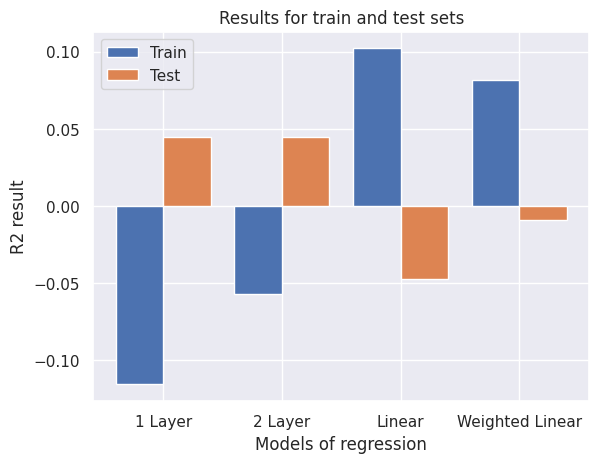

In [47]:
X = ['1 Layer','2 Layer','Linear','Weighted Linear']
Train_set = list_of_r2_train
Test_set = list_of_r2_test

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Train_set, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Test_set, 0.4, label = 'Test')

plt.xticks(X_axis, X)
plt.xlabel("Models of regression")
plt.ylabel("R2 result")
plt.title("Results for train and test sets")
plt.legend()
plt.show()

## MAE Barplot

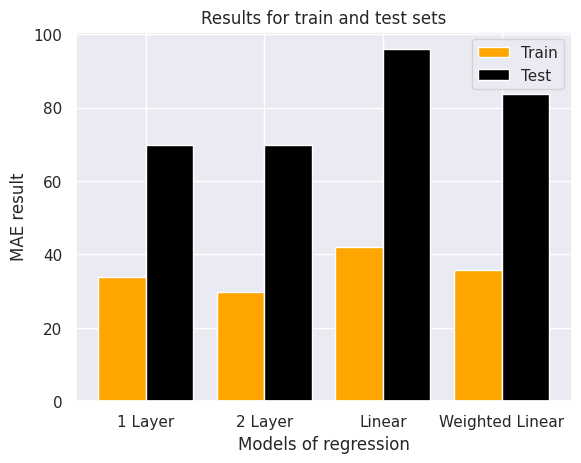

In [53]:
X = ['1 Layer','2 Layer','Linear','Weighted Linear']
Train_set = list_of_mae_train
Test_set = list_of_mae_test

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Train_set, 0.4, label = 'Train', color = 'orange')
plt.bar(X_axis + 0.2, Test_set, 0.4, label = 'Test', color = 'black')

plt.xticks(X_axis, X)
plt.xlabel("Models of regression")
plt.ylabel("MAE result")
plt.title("Results for train and test sets")
plt.legend()
plt.show()